## Part 1: Visualizing patterns in the data

* *First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv") 

#### Weekday plot

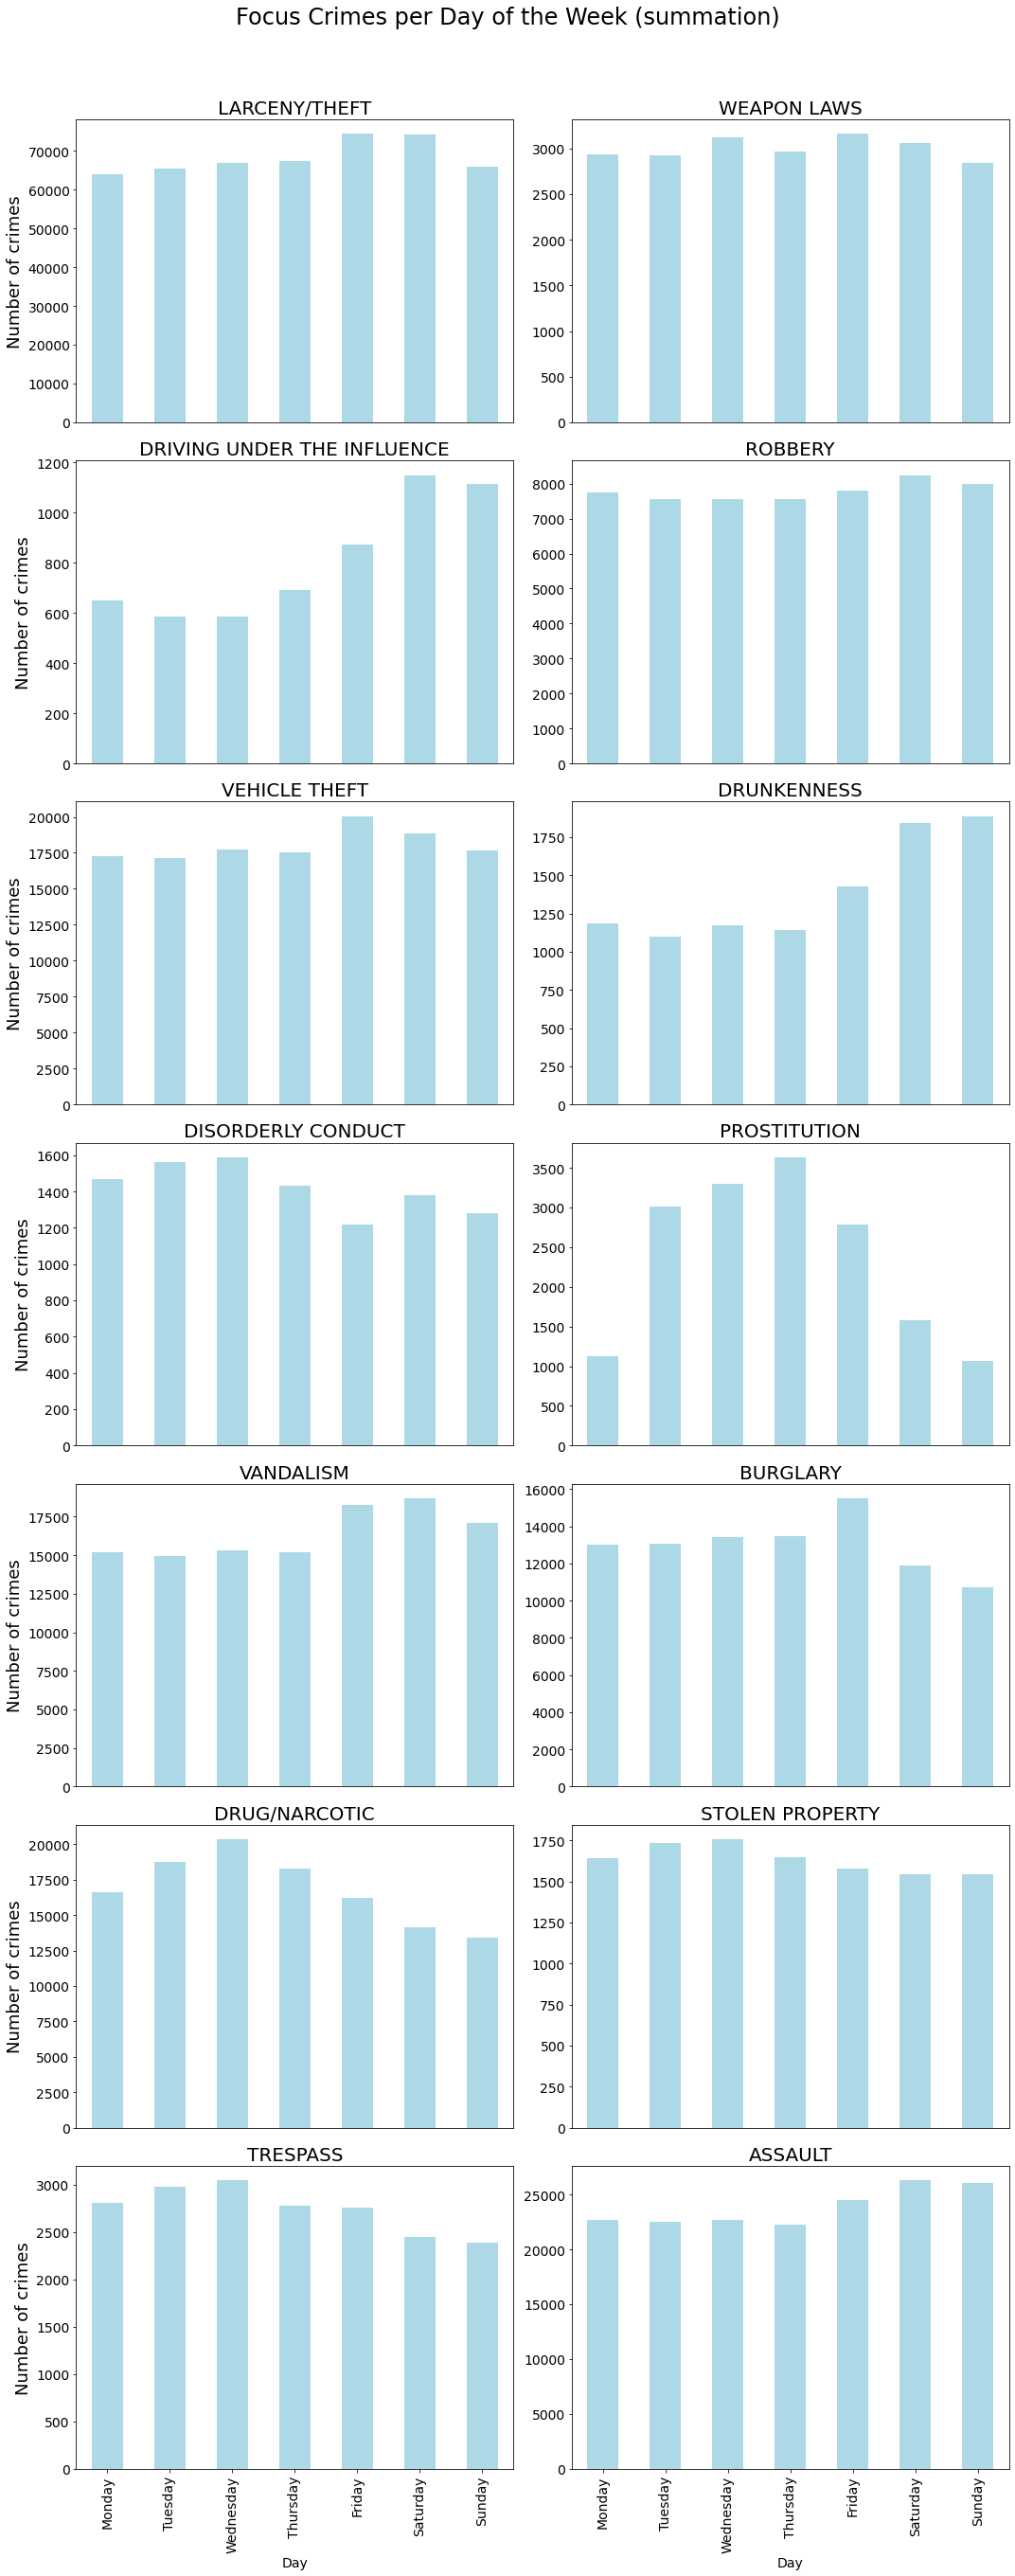

In [2]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

#create new column frome date with the days
data['Day'] = pd.to_datetime(data['Date']).dt.day_name()
data['Day'] = pd.Categorical(data['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

for i,focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_year = data_focus['Day'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar', color='lightblue', ax=axes[i])
    
    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18) 
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x axis labels
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)
    
    
axes[-1].set_xlabel('Day', fontsize=14)
axes[-2].set_xlabel('Day', fontsize=14)

# Add axes on the bottom subplots:
for ax in axes[-2:]:
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    ax.tick_params(axis='x', labelsize=14)

fig.suptitle('Focus Crimes per Day of the Week (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()

#### Weekday plot:
The plot above shows the number of focus crimes summed per day of the week, over the years in the dataset. Each subplot represents a focuscrime, and note that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the week for each focus crime.

By the y-axis on the plots it is easy to detect which crimes are comitted the most. This is clearly Larcency theft.
Some of the crimes are committed mostly in the weekend, such as driving under the influence, drunkennes and vandalism. Whereas some are more in the weekdays (suprisingly), such as prostitution, drug/narcotic and trespass. These are interesting trends that can be found from this plot.

#### Monthly plot:

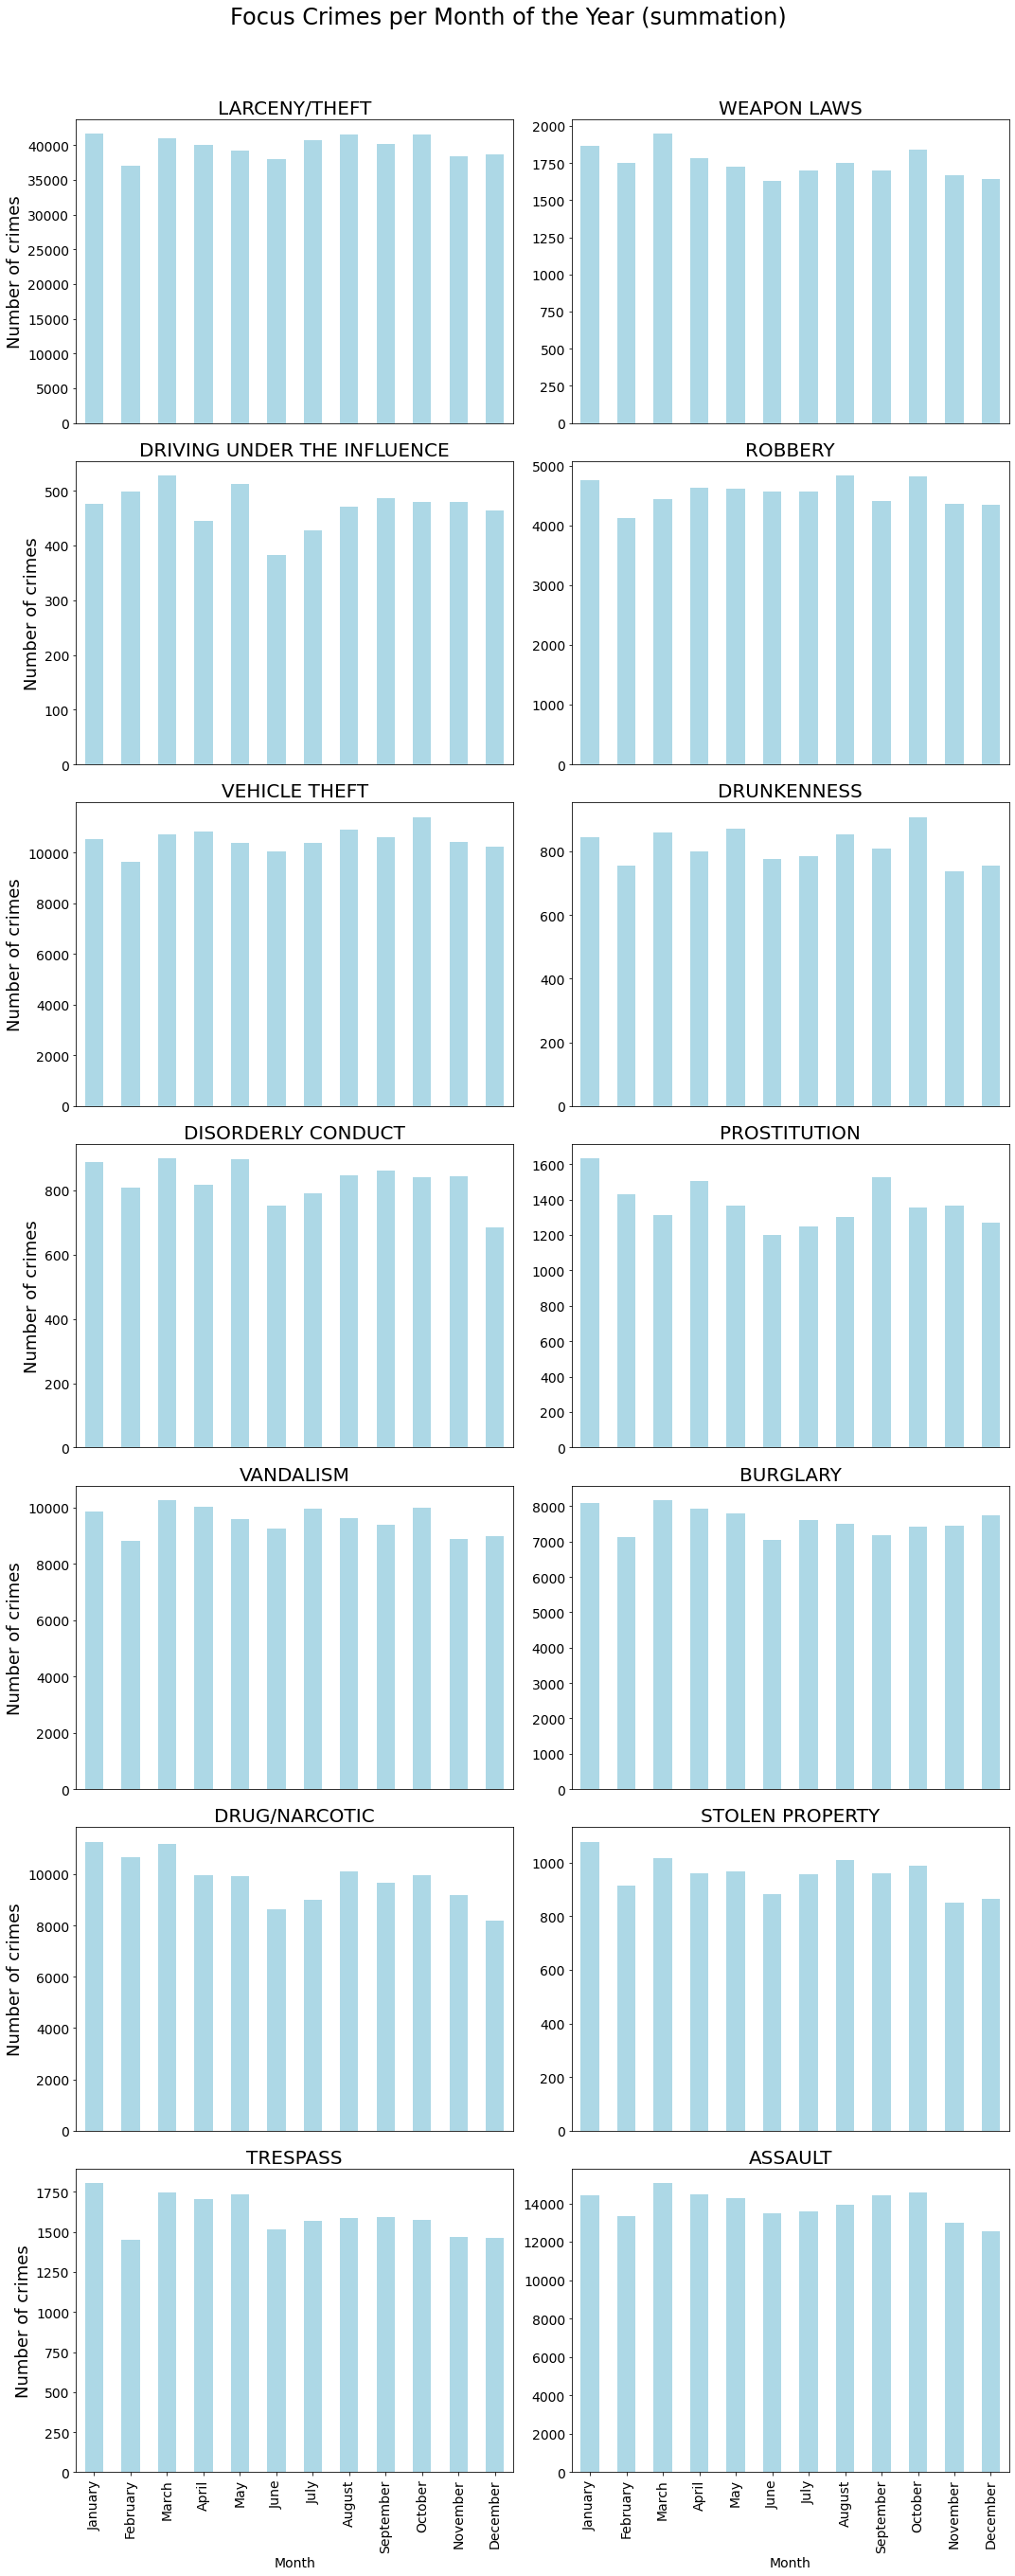

In [3]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

#create new column frome date with the months
data['Month'] = pd.to_datetime(data['Date']).dt.month_name()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=months_order, ordered=True)

for i,focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_year = data_focus['Month'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar', color='lightblue', ax=axes[i])

    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18) 
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x axis labels
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)
    
    
axes[-1].set_xlabel('Month', fontsize=14)
axes[-2].set_xlabel('Month', fontsize=14)

# Add axes on the bottom subplots:
for ax in axes[-2:]:
    ax.set_xticklabels(months_order)
    ax.tick_params(axis='x', labelsize=14)

fig.suptitle('Focus Crimes per Month of the Year (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()

#### Monthly plot:
The plot above shows the number of focus crimes summed per month of the year, over the years in the dataset. Each subplot represents a focuscrime, and note again that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the year for each focus crime.

Here you see a little less variation over the months than over the days of the week. For many of the crimes, there are no obvious patterns. But many of the focus crimes are less committed in december (and november) and more committed in january! I dont know what the reason might be.

#### Hour plot

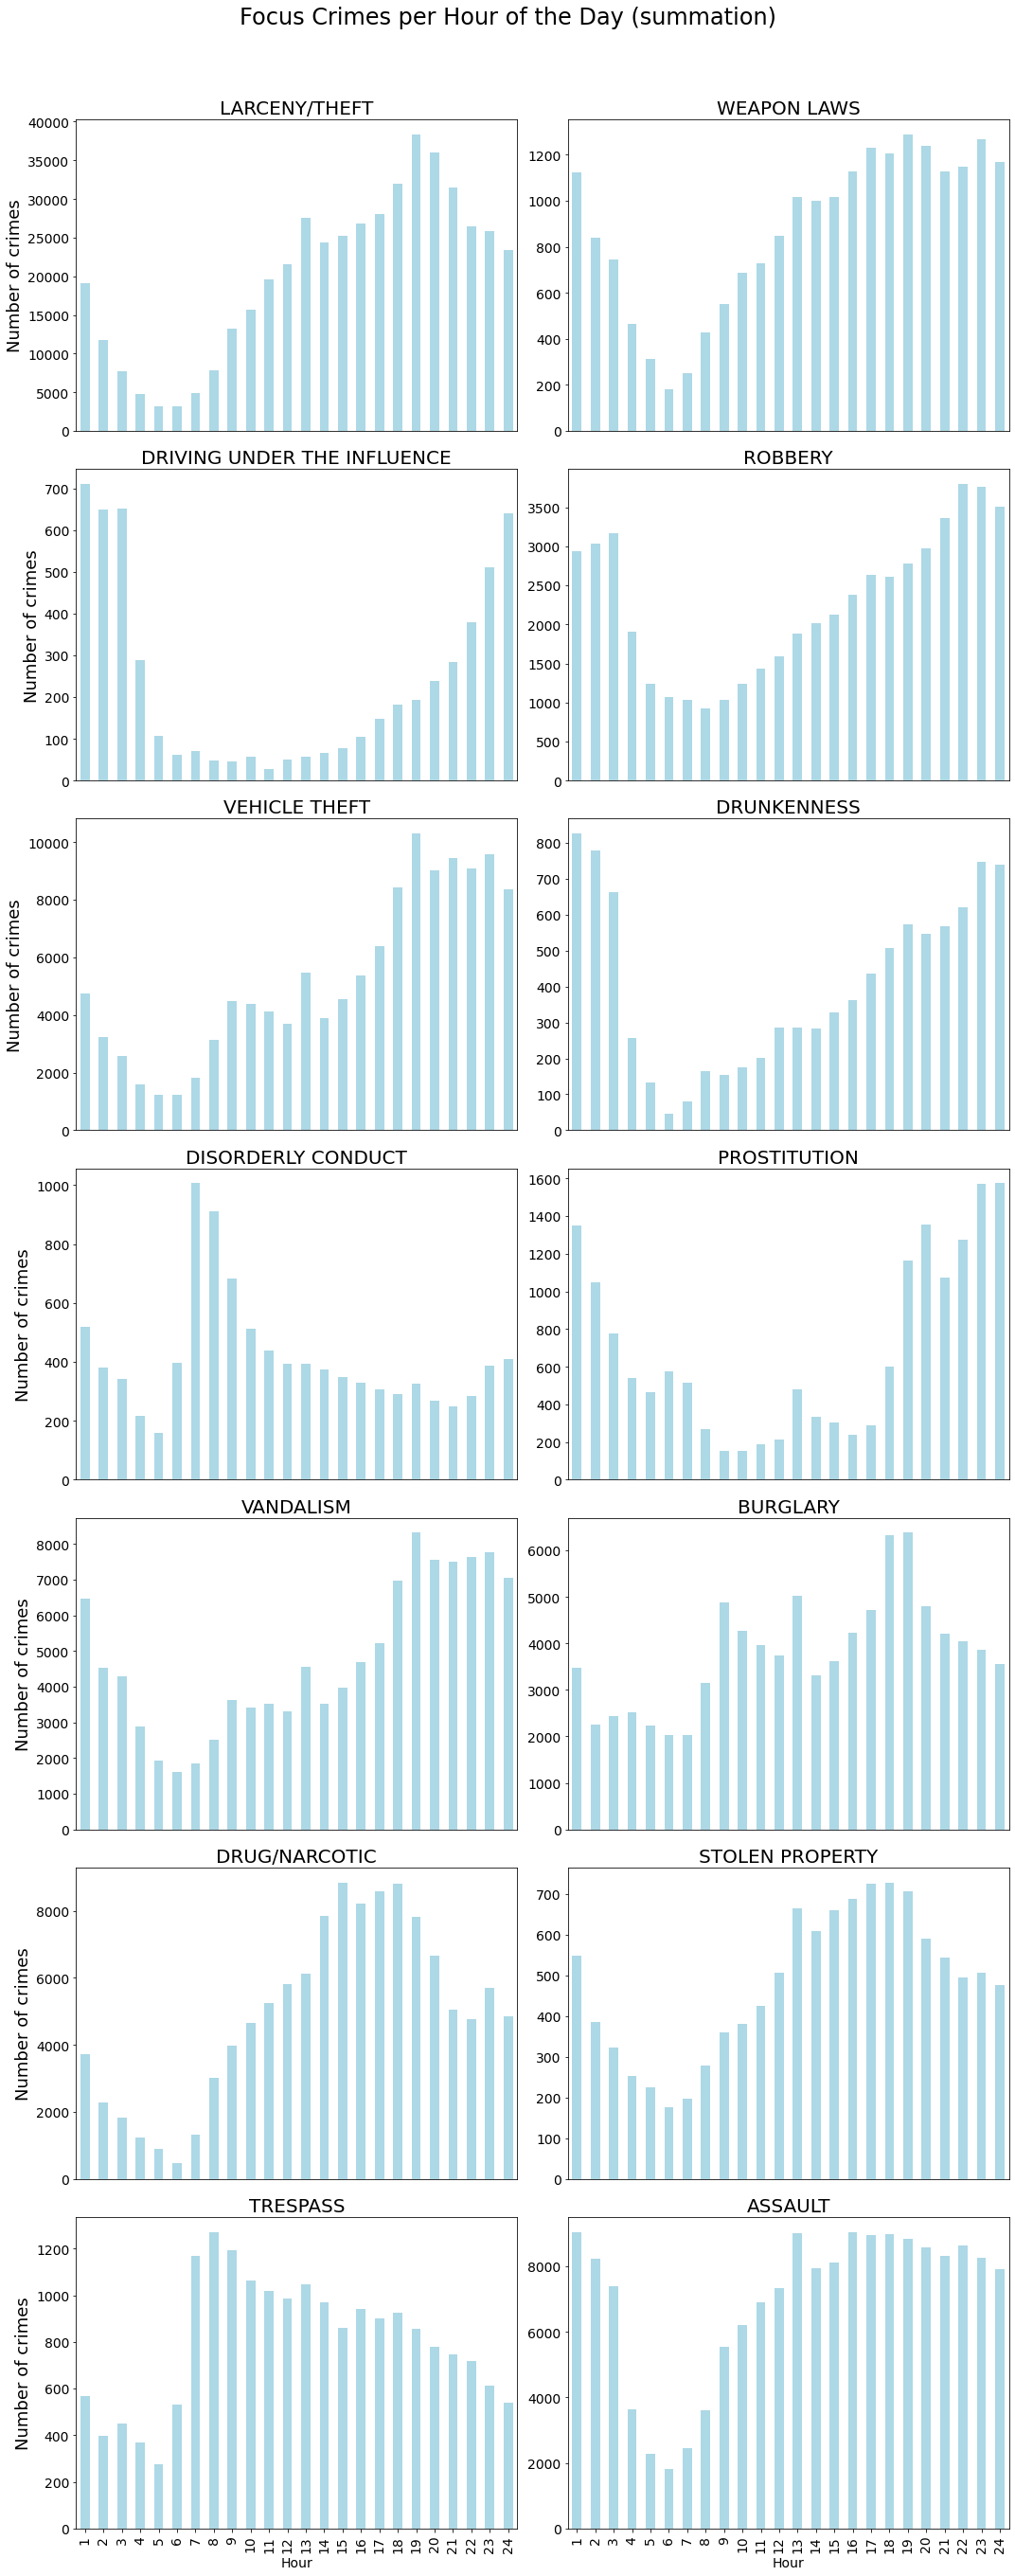

In [4]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

#create new column frome date with the hours
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour


for i,focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_year = data_focus['Hour'].value_counts().sort_index()
    crimes_per_year.plot(kind='bar', color='lightblue', ax=axes[i] ,xlim=(0.5, 24.5))

    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18) 
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x axis labels
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)

axes[-1].set_xlabel('Hour', fontsize=14)
axes[-2].set_xlabel('Hour', fontsize=14)

# Add axes on the bottom subplots:
for ax in axes[-2:]:
    ax.set_xticklabels(list(np.arange(1, 25)))
    ax.tick_params(axis='x', labelsize=14)



fig.suptitle('Focus Crimes per Hour of the Day (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()

#### Hour plot
The plot above shows the number of focus crimes summed per hour of the day, over the years in the dataset. Each subplot represents a focuscrime, and note once again that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the day for each focus crime.

This plot gives alot of information about the patterns of the commitment of focus crimes! A lot of the crimes tend to be really low in the early morning and rise throughout the whole day. Some differs from this though. Trespassing happens mostly in the morning from 7 and falls throughout the day. Burglary happens any time of the day. And wierdly enough disorderly conduct happens alot between 7 and 9 in the morning..

#### Hour of the week plot

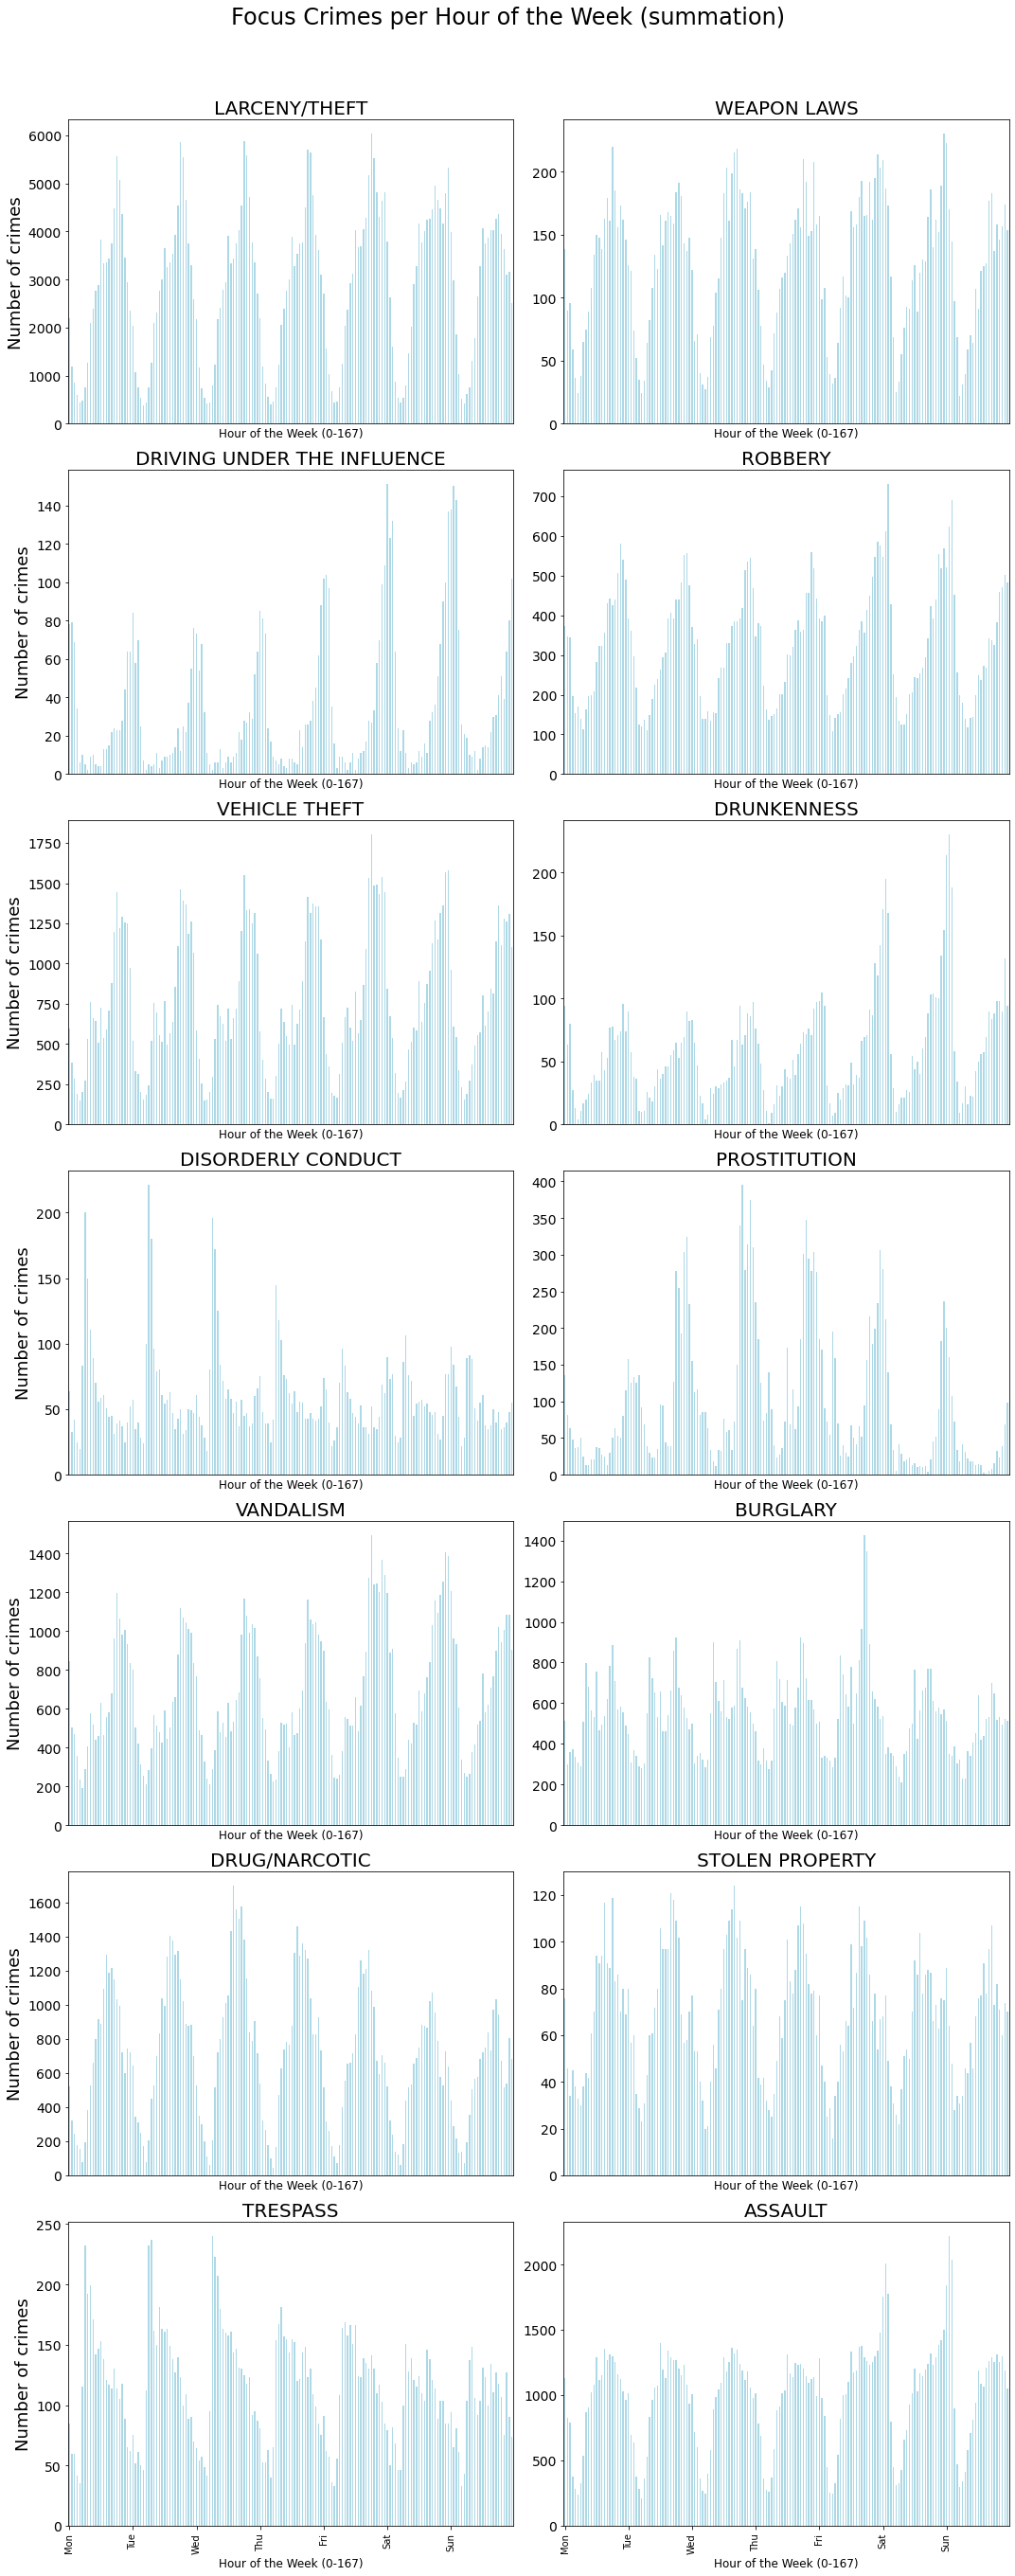

In [5]:
fig, axes = plt.subplots(nrows=(len(focuscrimes) + 1) // 2, ncols=min(2, len(focuscrimes)), figsize=(15, 5*(len(focuscrimes) + 1) // 2))
axes = axes.flatten()

# New column for the day of the week (0 = Monday to 6 = Sunday)
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.dayofweek

for i, focus in enumerate(focuscrimes):
    data_focus = data[data['Category'] == focus]
    crimes_per_week_hour = data_focus.groupby(['DayOfWeek', 'Hour'])['Category'].count()
    crimes_per_week_hour.plot(kind='bar', color='lightblue', ax=axes[i], xlim=(0.5, 168.5))

    if i % 2 == 0:  # Set y-axis label only on every other subplot
        axes[i].set_ylabel('Number of crimes', fontsize=18)
    axes[i].tick_params(axis='y', labelsize=14)
    if i < len(axes) - min(2, len(focuscrimes)):  # Remove x-axis ticks
        axes[i].set_xticks([])
    axes[i].set_title(focus, fontsize=20)

# x-axis label
for ax in axes:
    ax.set_xlabel('Hour of the Week (0-167)', fontsize=12)

# Add x-axis ticks to represent each day of the week on the bottom two subplots
axes[-1].set_xticks(np.arange(0, 168, 24))
axes[-1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[-2].set_xticks(np.arange(0, 168, 24))
axes[-2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

fig.suptitle('Focus Crimes per Hour of the Week (summation)', fontsize=24, y=1.02)

plt.tight_layout()
plt.show()


#### Hour of the week plot
The plot above shows the number of focus crimes summed per hour of the week, over the years in the dataset. Each subplot represents a focuscrime, and note once again that the y-axis differs alot in each plot, so that you are able to see how the crime rates changes over the week for each focus crime.

In this plot, you can see both the daily trends and the weekly trends. You can even see if there is a change in the hours of highest crimes rates depending on the weekday. This gives an even more nuanced picture of when each crime happens during the week! 

#### Calender plot

* *Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.*

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


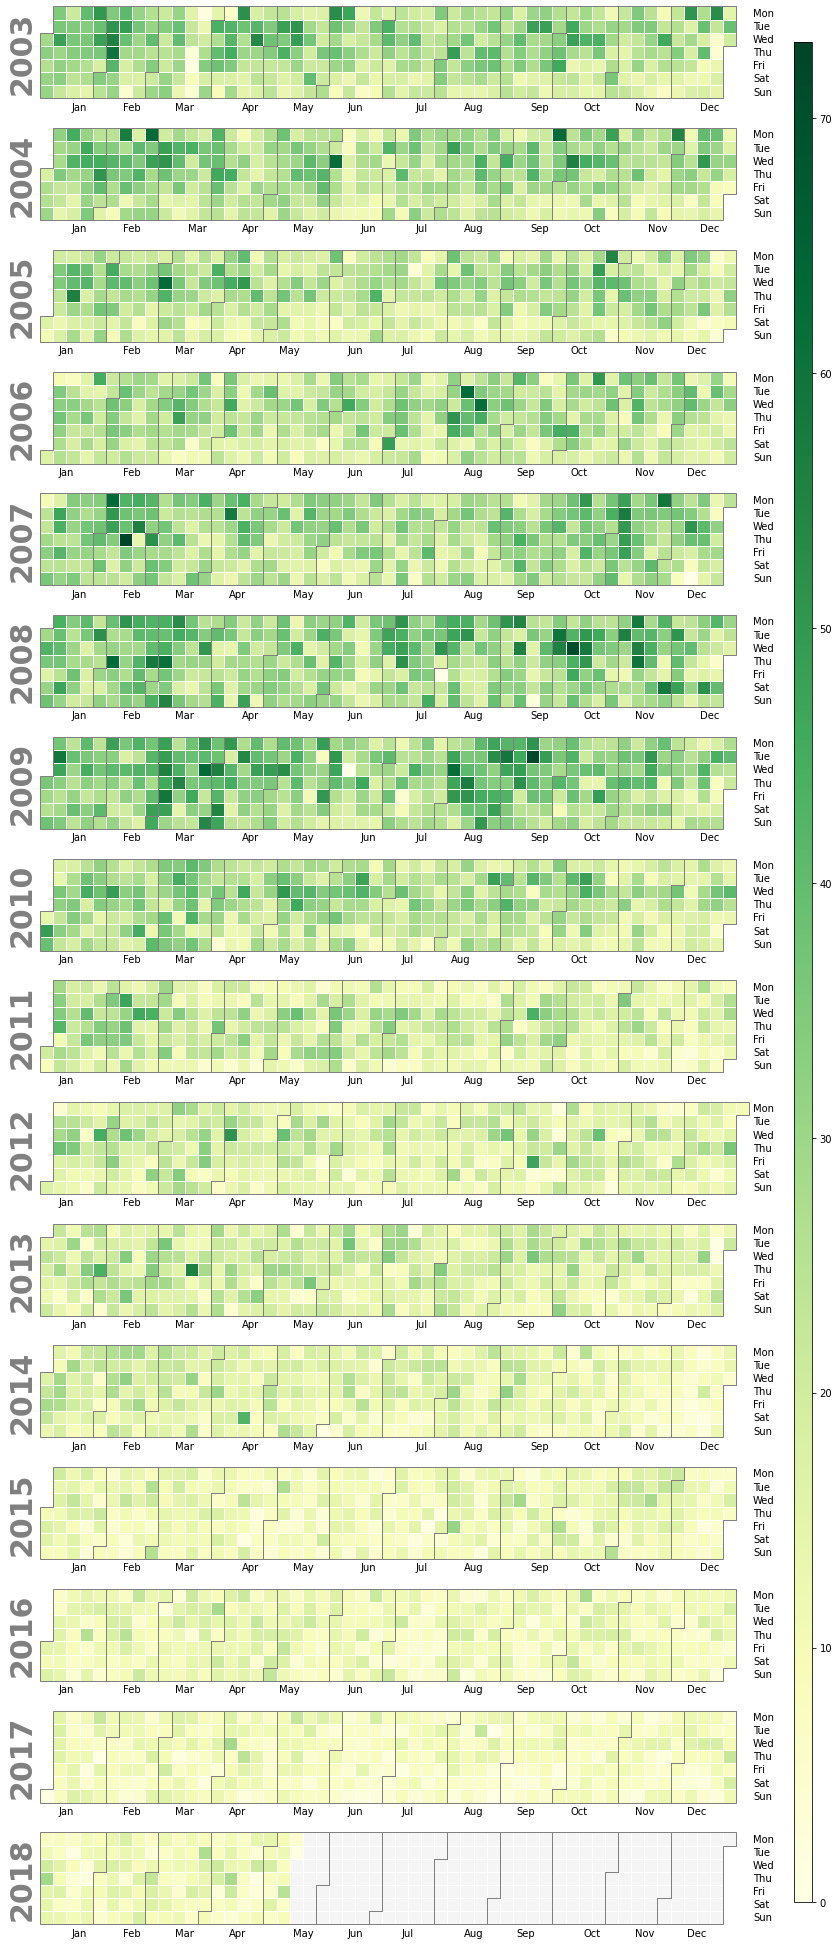

In [7]:
import calplot

# Filter data for 'DRUG/NARCOTIC' crimes
drug_data = data[data['Category'] == 'DRUG/NARCOTIC']

# Set 'Date' column as index
data['Date'] = pd.to_datetime(data['Date'])
drug_data.set_index('Date', inplace=True)

# get daily drug crimes counts
daily_drug_crimes = drug_data.resample('D').size()

# Plot the calendar heatmap for drug/narcotic crimes
calplot.calplot(daily_drug_crimes, cmap='YlGn', colorbar=True);

#### Calender plot
In the calender plot above, the number of drug/narcotic crimes are plotted per day over the years of the dataset. You can easily tell by the color scheme here, that the number of this crime type has fallen since the 2000's into the 2010's. You can also tell that some periods have had more crimes committed followed by less regristrations of this crime, flucturating throughout the year.

#### Polar plot

* *Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.*

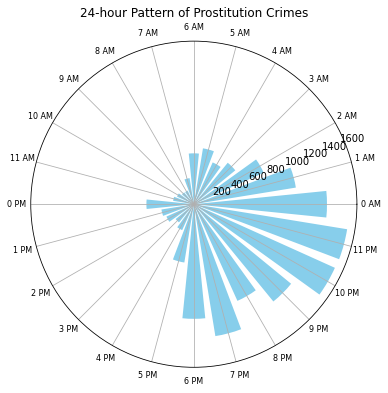

In [8]:
# Convert 'Time' column to datetime and extract the hours
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour

# Filter data for prostitution crimes
prostitution_data = data[data['Category'] == 'PROSTITUTION']

# Group data by hour and count number of crimes
hourly_crimes = prostitution_data.groupby('Hour').size()

# Create polar bar plot
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)
angles = [i * 2 * np.pi / 24 for i in range(24)] 
bars = plt.bar(angles, hourly_crimes, width=0.2, color='skyblue')

# Customize plot
plt.title('24-hour Pattern of Prostitution Crimes')
plt.xticks(ticks=angles, labels=[f"{i % 12} {'AM' if i < 12 else 'PM'}" for i in range(24)], fontsize=8) 

plt.gca().yaxis.grid(False)  # Remove radial gridlines

# Show plot
plt.show()


#### Polar plot
In the polar plot above, the number of prostitution crimes are plotted summed per hour over the years of the dataset. 
Here you can easily tell that there is one side of the day where prostitution is less committed/regristered. It is mostly committed from 6 PM to 1 AM. 

#### Reflection on LLM use

* *Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).*

In the assignments with barplots I've used some chatGPT3.5 to debug my code, and help me when i was stuck. Then i would feed GPT my code and write either the error i was encountering, or why/where i was stuck in getting the result i wanted. It could then help me with finding errors in my coding, or providing ideas for functions or methods i could use further on. 
For plotting the calender plot and polar plot, i needed help with how to use calplot and polar plots. Then i could get an example of usage, and modify for it to fit my data and previous code.

## Part 2: Dataviz questions

* *What is the difference between data and metadata? How does that relate to the GPS tracks-example?*

Metadata is data about/constituting the data, adding context or structure to the data. In relation to the GPS track example, the data could be measured latitude and longitude coordinates, and the metadata could be the time stamples of recorded data, or how you named that recorded run in your GPS watch for example. The metadata then adds information about the time of the run for example.

* *Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.*
    * *Mention something that the human eye is very good at.*
    * *Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.*

We are great at recognising patterns and using our intuition with visualized data. But we should never trust our vision completely, since it relies on the context and interpretation that we ourselves have or are given. Our eyes themselves dont really detect biases, but our cognitive skills might if we are lucky. If not we have to do some more data analysis to explore the background of the data and possible biases. 
Also, we are good at detecting patterns, but smaller differences are visually difficult to distinguish. Such as piecharts, where the angles that are similar (but different) are problematic to distinguish.

* *Simpson's paradox is hard to explain. Come up with your own example - or find one online.*

The paradox arises, when there are hidden variables that split the data into multible distributions. So the causal interpretation of some data can be non-existing or reversed when splitting the data into multible groups. 
An example found online: Basketball skills gets worse with height. You plot height against basketball skils, and your sample contains both young players (as children teenagers) and older senior players. The young people are the ones in training and are naturally better than old players, AND mostly shorter. I will show that basketball skills get worse with increasing height of the players, but the bias is in the data, that really can be seen as two different distributions. Individually the skills are probably increasing with height. 

* *In your own words, explain the differnece between exploratory and explanatory data analysis.*

Exploratory is understanding and exploring the data. This works great as the initial phase of data analysis, by plotting the data to understand the data intervals and patterns.

Explainatory aims at *explaining* relationships and insight of the data. This could be hypothesis testing and more explainatory statistics. 


# Part 3: Visualizing geodata using Plotly

* Create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays.

In [9]:
# import libraries
import plotly.express as px
import json

# Load GeoJSON file
with open("../files/sfpd.geojson", 'r') as f:
    sfpd_district = json.load(f)

# filter the data to contain only vehicle theft on Sundays
data_subset3 = data[(data["Category"] == 'VEHICLE THEFT') & (data["DayOfWeek"] == 6)]

# aggregate data to districts
no_thefts = data_subset3.groupby('PdDistrict').agg({'IncidntNum': 'count'}).reset_index()

# find min and max counts
min_val = no_thefts.IncidntNum.min()
max_val = no_thefts.IncidntNum.max()

# plot map of SF
fig = px.choropleth_mapbox(no_thefts, geojson=sfpd_district, locations='PdDistrict', color='IncidntNum',
                           featureidkey="properties.DISTRICT",
                           color_continuous_scale="Viridis",
                           range_color=(min_val, max_val),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'IncidntNum':'Theft Incidents'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?

Based on number of incidents in each district the best place to park on Sundays is at Tenderloin (356 incidents) and the worst place to park is at Ingleside (2846 incidents). However, the size of the districts varies a lot and the Tenderloin district is rather small compared to the other districts. One must thus take that into consideration when arguing for the safest and worst place to park a car on Sundays. A normalization of the number of incidents compared to district size might give a better insight into the safety of parking a car in a district.

* Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?

In [10]:
# plot map of SF
fig = px.choropleth_mapbox(no_thefts, geojson=sfpd_district, locations='PdDistrict', color='IncidntNum',
                           featureidkey="properties.DISTRICT",
                           color_continuous_scale="Viridis",
                           range_color=(min_val-max_val, max_val*2),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'IncidntNum':'Theft Incidents'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Before, the map was plotted with a color range between the minimum and maximum theft incident number. In the map plotted above the color range has been extended with the size of the maximum theft incident number in both directions (range_color = (min_val-max_val, max_val*2)). This color range makes the difference between districts less evident, because all districts have a theft incident number that lies within in a small range on the entire color range.

* Why do you think perceptual errors are a problem? Try to think of a few examples.

When we create plots and visualizations the aim is to clarify and uncover data-patterns. However, perceptual errors may rise misinterpretations and confusion. A clear example of perceptual errors is shown in the visualizations above, where the colors in the second plot are very difficult to tell apart compared to the first plot. And even though the colors in the first plot are easier to interpret and tell apart it is still somewhat difficult to tell exactly what order the districts would be ranked in according to the number of incidents based on the colors.  Another example of perceptual errors could arise with pie charts, where both volume- and angle determination comes in play.

# Part 4: Errors in the data

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors can bias the binned versions of the data. 

[Prostitution on Thursdays](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png): This data-error would bias the weekday plot (bins=weekdays) and make Thursdays look busier than it actually is.

[Time recordings](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png): This data-error could bias the hour plot (bins=hours), since crimes committed at e.g. 14:48 could be noted as 15:00 and therefore fit into the wrong bin (hour). It will thus show a wrong distribution of when crimes are committed.

[Sex offences at Hall of Justice](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png): This data-error will bias the district plot (bins=districts), such that it looks like a lot of the crimes are committed in this district (even though the crimes might have been committed in other districts).

* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

Each of the errors would result in different misconceptions and analyses. Analyses on wrong time recordings and crime scenes could eventually lead to wrong duty schedules and routes of the police officers and thereby result in more crimes in uncovered places.

* Find your own example of human noise in the data and visualize it.

We could not find any human noise in the data. However, we tried different things to look for noise. We tried to group by adresses and sort by number of crimes committed at that address. It showed that in the top 20 busy addresses only 1 address showed not to be a block. So, we investigated further if any of the crime categories would show something interesting for crimes committed at blocks vs not blocks. We find that in many of the categories the address is mainly typed as block and that burglary mainly happens in blocks, which were expected since it happens inside homes. But we did not find any noise in particular. See below for the busiest addresses and visualization of crime address distributions.

In [11]:
data.groupby(data['Address']).count().sort_values('PdId', ascending=False)['PdId'].head(20)

Address
800 Block of BRYANT ST          63115
800 Block of MARKET ST          16664
2000 Block of MISSION ST        10686
1000 Block of POTRERO AV         9720
900 Block of MARKET ST           7596
0 Block of TURK ST               6727
0 Block of 6TH ST                6507
16TH ST / MISSION ST             6131
300 Block of ELLIS ST            6088
1000 Block of MARKET ST          5582
1100 Block of MARKET ST          5474
400 Block of ELLIS ST            5457
2000 Block of MARKET ST          5323
100 Block of OFARRELL ST         5280
3200 Block of 20TH AV            5107
700 Block of MARKET ST           5005
500 Block of JOHNFKENNEDY DR     4826
0 Block of UNITEDNATIONS PZ      4774
100 Block of 6TH ST              4461
300 Block of EDDY ST             4331
Name: PdId, dtype: int64

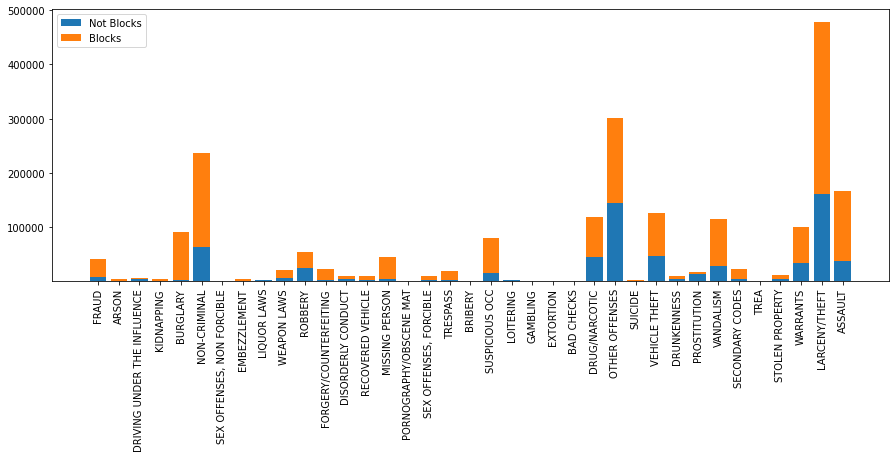

In [12]:
# Create datasets containing addresses with blocks and without blocks
not_blocks = data[~data['Address'].str.contains('Block')]
blocks = data[data['Address'].str.contains('Block')]

# Calculate category counts for not_blocks and blocks datasets
not_blocks_counts = not_blocks['Category'].value_counts()
blocks_counts = blocks['Category'].value_counts()

# Get unique categories from both datasets
categories = list(set(list(not_blocks_counts.index) + list(blocks_counts.index)))

# Initialize dictionaries to store counts for each category
not_blocks_category_counts = {cat: not_blocks_counts.get(cat, 0) for cat in categories}
blocks_category_counts = {cat: blocks_counts.get(cat, 0) for cat in categories}

# Plotting
plt.figure(figsize=(15, 5))

# Plot not_blocks counts
plt.bar(categories, list(not_blocks_category_counts.values()), label='Not Blocks')

# Plot blocks counts stacked on top
plt.bar(categories, list(blocks_category_counts.values()), bottom=list(not_blocks_category_counts.values()), label='Blocks')

plt.xticks(rotation=90)
plt.legend()
plt.show()


* Did you find LLMs useful for anything in this exercise? Explain why/why not.

We found ChatGPT-3.5 very useful in part 4 to create the stacked barchart, but for part 3 we mainly used google searches to create the plots and figure out how it worked. ChatGPT-3.5 could not provide much help to part 4 (text questions) even if we wanted to use it, since the questions were very focused on the dataset (that ChatGPT-3.5 does not know about).

# contributions